<!--Información del curso-->
<img align="left" style="padding-right:10px;" src="figuras/banner_dl.png">


<br><br><center><h1 style="font-size:2em;color:#2467C0"> Operaciones lógicas y máscaras </h1></center>
<br>
<table>
<col width="550">
<col width="450">
<tr>
    
    
<td><img src="figuras/openCV.jpg" align="middle" style="width:550px;"/></td>
<td>

**OpenCV** es una biblioteca libre desarrollada originalmente por Intel. Vio la luz en el año 1999. Escrita originalmente en C/C++, su mejor virtud es que es multiplataforma, se puede ejecutar en diferentes sistemas operativos (Linux, Windows, Mac OS X, Android e iOS). También la podemos utilizar en diferentes lenguajes de programación como Java, Objective C, C# y *Python*.

Quizás sea la biblioteca de visión artificial más importante y más usada. Es utilizada por universidades, empresas y gente del movimiento Maker para dar rienda suelta a su imaginación al tratarse de un software libre.

En este notebook comenzaremos con el tratamiento de imágenes en Python mediante esta librería, más específicamente vamos a ver como cargar o  leer una imagen, conversión a blanco y negro, filtros y otras operaciones que serán útiles dentro del curso.


   
<br>
</td>
</tr>
</table>

# 0. Librerías básicas

In [1]:
#Librerías básicas de esta notebook
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

In [2]:
def plt_imshow(title, image):
    image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.title(title)
    plt.grid(False)
    plt.show()

# 1. Operaciones lógicas


 ## Implementación de operadores OpenCV AND, OR, XOR y NOT  

<div class="alert alert-info">
 <ul>
  <li>Generar imagenes como las que se muestran a continuación (300 x 300)</li>
</ul> 

</div>
<img align="left" width="500"  float= "none" align="middle" src="figuras/rectangulo_circulo.png">

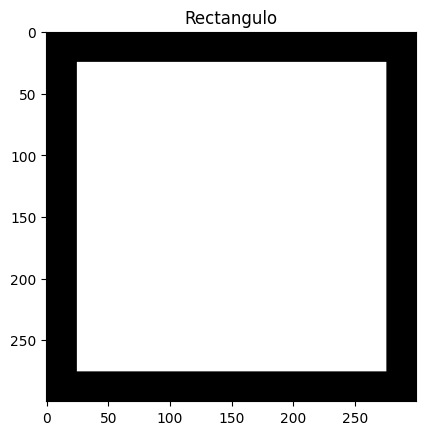

In [3]:
# Rectangulo
rectangle=np.zeros((300, 300), dtype="uint8")
cv.rectangle(rectangle, (25, 25), (275, 275), 255, -1)
plt_imshow("Rectangulo", rectangle)

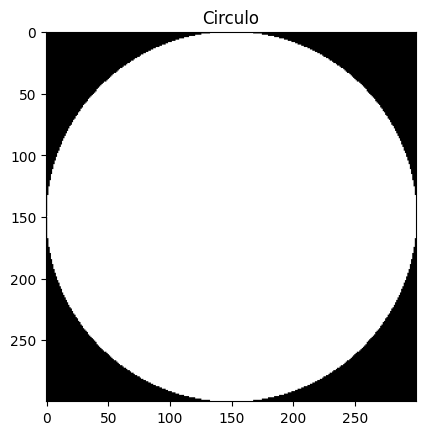

In [4]:
# Circulo
circle=np.zeros((300, 300), dtype = "uint8")
cv.circle(circle, (150, 150), 150, 255, -1)
plt_imshow("Circulo", circle)

<div class="alert alert-info">
 <ul>
  <li>Aplicar operaciones de AND, OR y XOR y NOT</li>
</ul> 


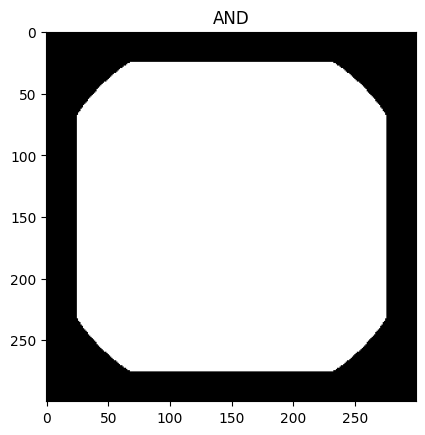

In [5]:
#AND
img_and=cv.bitwise_and(rectangle, circle)
plt_imshow("AND", img_and)

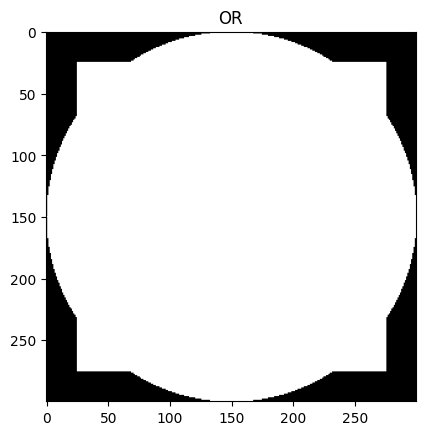

In [6]:
#OR
img_or=cv.bitwise_or(rectangle, circle)
plt_imshow("OR", img_or)

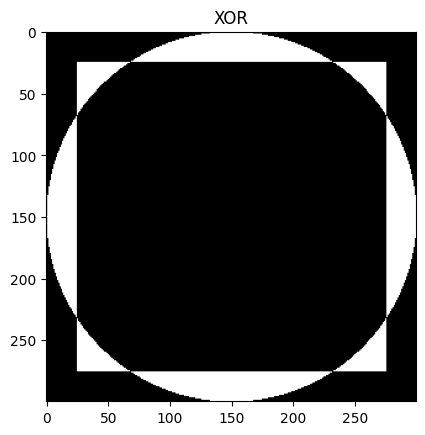

In [7]:
#XOR
img_xor=cv.bitwise_xor(rectangle, circle)
plt_imshow("XOR", img_xor)

<div class="alert alert-info">
 <ul>
  <li>Aplicar la operacón inversa a ambas imagenes</li>
</ul> 

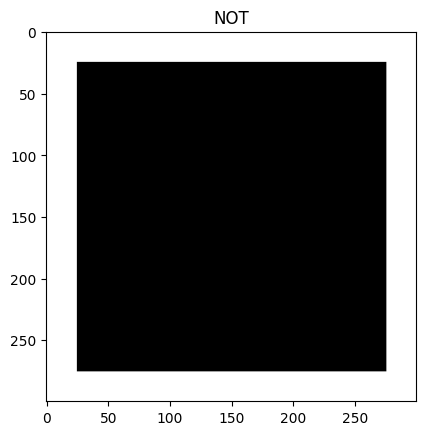

In [8]:
#Rectangulo
rectangle_inv=cv.bitwise_not(rectangle)
plt_imshow("NOT",rectangle_inv)

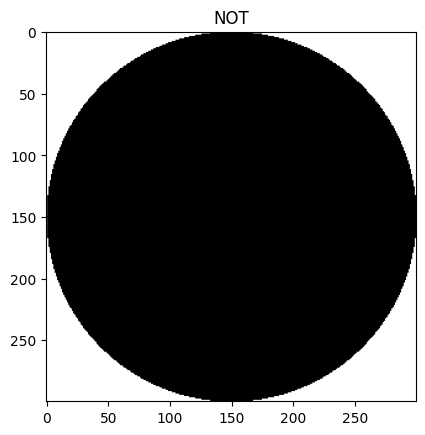

In [9]:
#Circulo
circle_inv=cv.bitwise_not(circle)
plt_imshow("NOT", circle_inv)

# 2. Máscaras

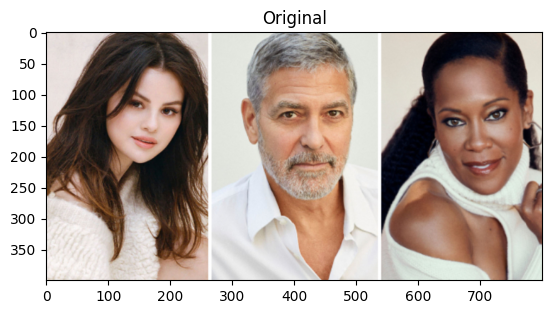

(400, 800, 3)

In [10]:
# Abrir el archivo 'figuras/people.jpg'
img_cara=cv.imread('figuras/people.jpg')
plt_imshow("Original",img_cara)
img_cara.shape

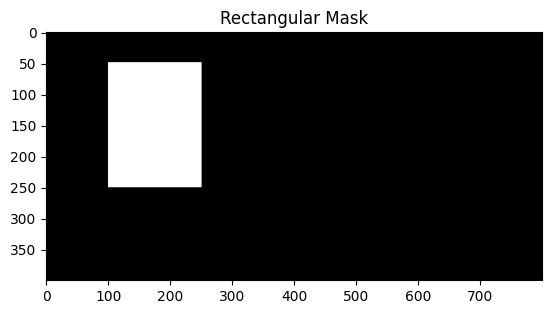

In [11]:
# Mascara rectangular
rectangle_masc=np.zeros(img_cara.shape[:2], dtype="uint8")
cv.rectangle(rectangle_masc, (100, 50), (250, 250), 255, -1)
plt_imshow("Rectangular Mask", rectangle_masc)

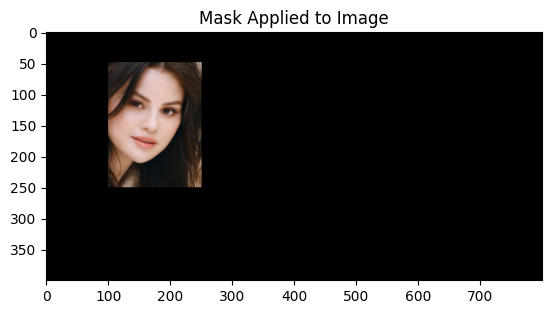

In [12]:
#Aplicar la mascara rectangular
img_mascara_rectangular=cv.bitwise_and(img_cara, img_cara, mask=rectangle_masc)
plt_imshow("Mask Applied to Image", img_mascara_rectangular)

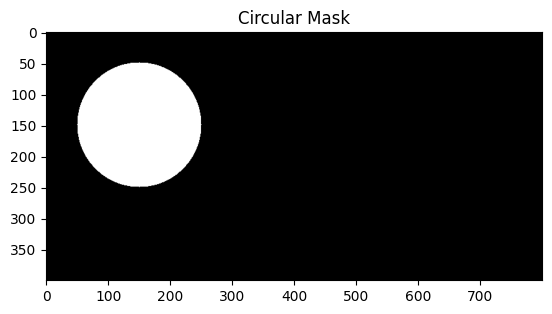

In [13]:
# Mascara circular y su implementación
circle_masc=np.zeros(img_cara.shape[:2], dtype="uint8")
cv.circle(circle_masc, (150, 150), 100, 255, -1)
plt_imshow("Circular Mask", circle_masc)


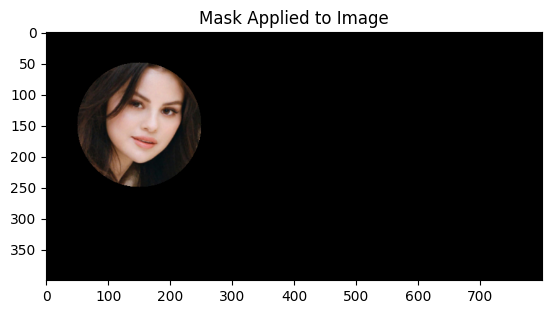

In [14]:
img_mascara_circular=cv.bitwise_and(img_cara, img_cara, mask=circle_masc)
plt_imshow("Mask Applied to Image", img_mascara_circular)

# 3. Operaciones morfológicas 

# Imagen figuras/labdatos.png en escala de grises


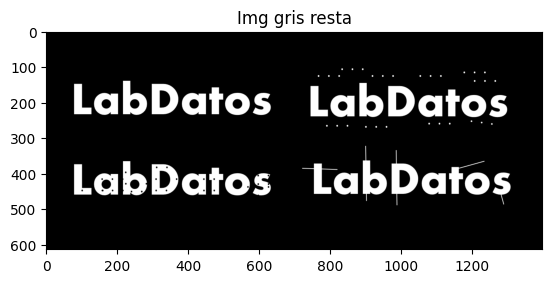

(613, 1398)

In [28]:
img_letra=cv.imread('figuras/labdatos.png')
img_gray=cv.cvtColor(img_letra,cv.COLOR_BGR2GRAY)
plt_imshow("Img gris resta",img_gray)
img_gray.shape

### Erosión

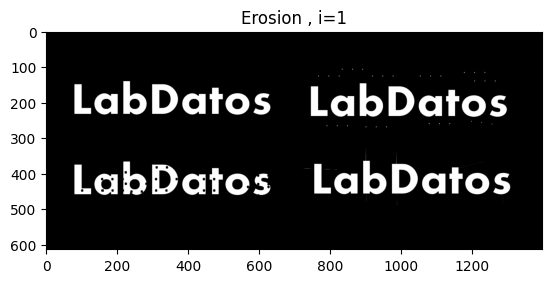

In [29]:
#Erosión
erosion = cv.erode(img_gray.copy(), None, iterations=1)
plt_imshow('Erosion , i=1', erosion)

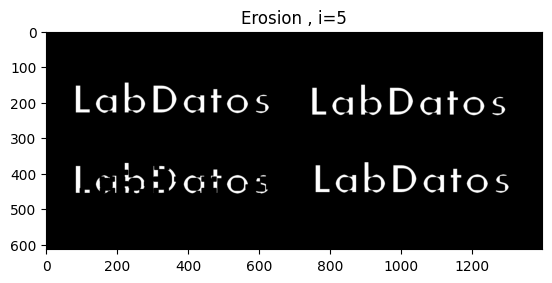

In [30]:
# Varias erosiones
erosion = cv.erode(img_gray.copy(), None, iterations=5)
plt_imshow('Erosion , i=5', erosion)

### Dilatación

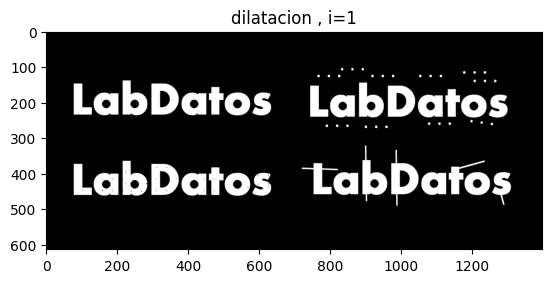

In [31]:
#Dilatación
dilatacion = cv.dilate(img_gray.copy(), None, iterations=1)
plt_imshow('dilatacion , i=1', dilatacion)

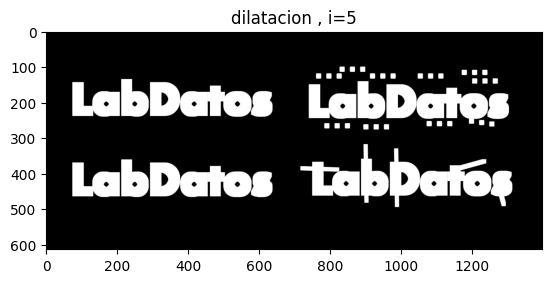

In [32]:
#La dilatación varias veces
dilatacion = cv.dilate(img_gray.copy(), None, iterations=5)
plt_imshow('dilatacion , i=5', dilatacion)

# Opening

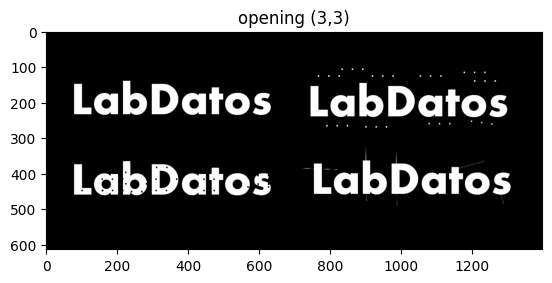

In [42]:
#Opening
kernel=cv.getStructuringElement(cv.MORPH_RECT, (3,3))
opening=cv.morphologyEx( img_gray.copy(), cv.MORPH_OPEN, kernel)
plt_imshow('opening (3,3)',opening)

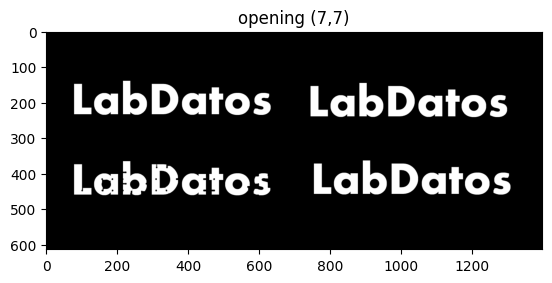

In [43]:
kernel=cv.getStructuringElement(cv.MORPH_RECT, (7,7))
opening=cv.morphologyEx( img_gray.copy(), cv.MORPH_OPEN, kernel)
plt_imshow('opening (7,7)',opening)

## Closing

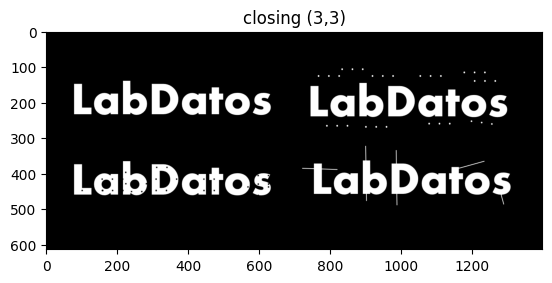

In [44]:
#Closing
kernel = cv.getStructuringElement(cv.MORPH_RECT, (3,3))
closing = cv.morphologyEx( img_gray.copy(), cv.MORPH_CLOSE, kernel)
plt_imshow('closing (3,3)',closing)

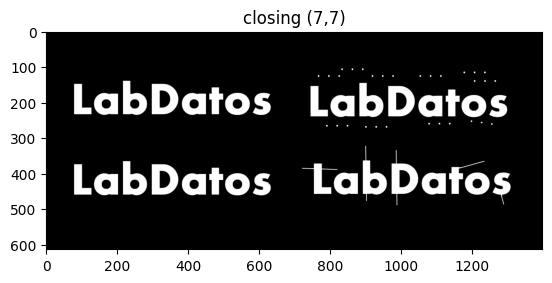

In [45]:
kernel = cv.getStructuringElement(cv.MORPH_RECT, (7,7))
closing = cv.morphologyEx( img_gray.copy(), cv.MORPH_CLOSE, kernel)
plt_imshow('closing (7,7)',closing)

# Máscara para un rango de color

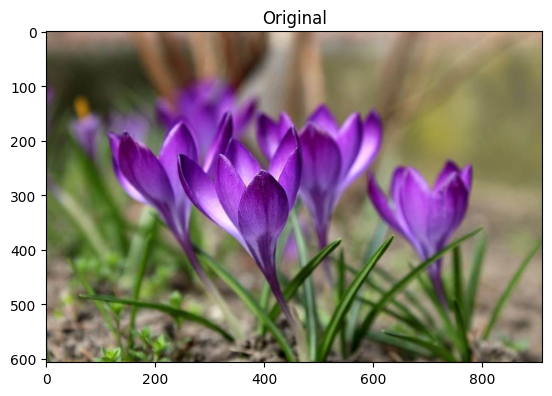

(607, 910, 3)

In [15]:
#Mostramos la imagen original
img_flower=cv.imread('figuras/flor_morada.jpg')
plt_imshow("Original",img_flower)
img_flower.shape

In [16]:
#Llevamos a cabo el cambio de espacio de color y definimos los rangos
#(hMin = 85 , sMin = 34, vMin = 21)
#(hMax = 164 , sMax = 255, vMax = 255)

img_hsv=cv.cvtColor(img_flower,cv.COLOR_BGR2HSV)
inferior=np.array([84,34,21])
superior=np.array([164,255,255])

In [17]:
#Aplicamos la mascara de la region de color
mascara=cv.inRange(img_hsv, inferior, superior)
mascara.shape

(607, 910)

In [18]:
# Revisamos los valores de los pixeles


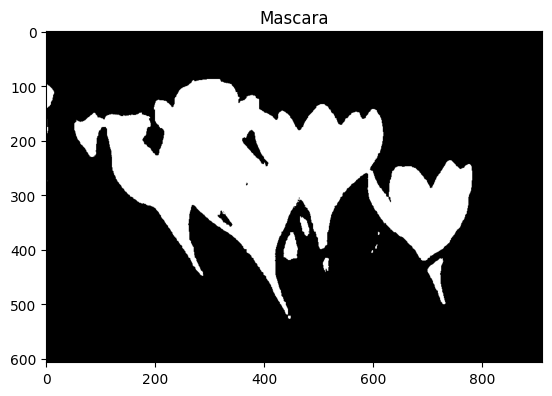

In [19]:
# Visualizamos la mascara
plt_imshow("Mascara", mascara)

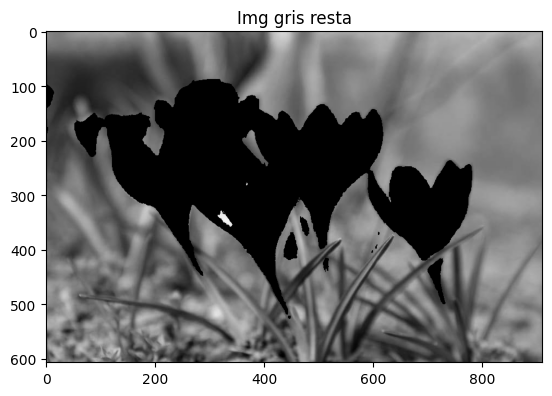

(607, 910)

In [20]:
#Obtenemos la imagen en escala de grisis y eliminamos los valores de la mascara
img_gray=cv.cvtColor(img_flower,cv.COLOR_BGR2GRAY)
img_gray_resta=cv.subtract(img_gray,mascara)
plt_imshow("Img gris resta",img_gray_resta)
img_gray_resta.shape

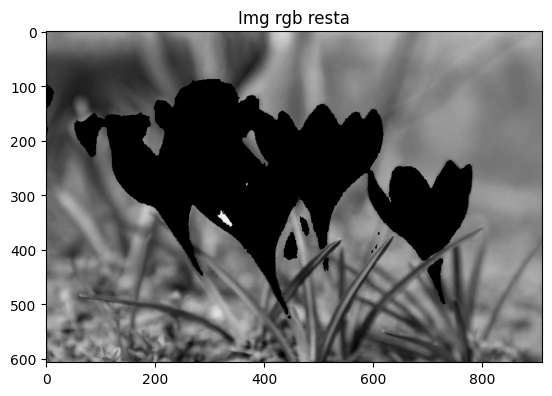

(607, 910, 3)

In [21]:
#Convertimos la imagen resultante en RGB
img_gray_resta_rgb=cv.cvtColor(img_gray_resta, cv.COLOR_GRAY2BGR)
plt_imshow("Img rgb resta",img_gray_resta_rgb)
img_gray_resta_rgb.shape

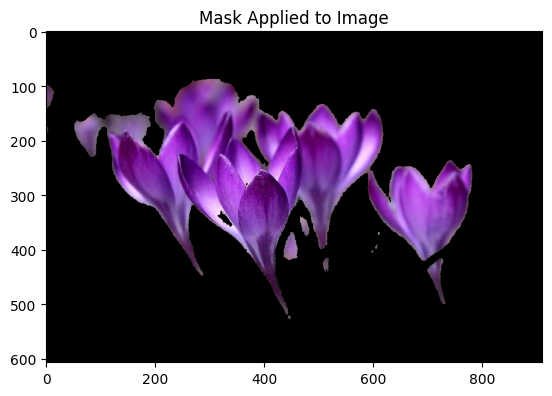

In [22]:
#Obtenemos la mascara aplicada a la imagen real
img_mascara=cv.bitwise_and(img_flower, img_flower, mask=mascara)
plt_imshow("Mask Applied to Image", img_mascara)

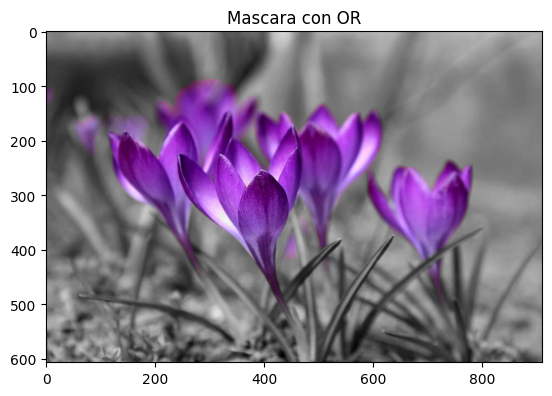

In [23]:
#Resaltando un color en una imagen
img_or_flor=cv.bitwise_or(img_mascara, img_gray_resta_rgb)
plt_imshow("Mascara con OR", img_or_flor)

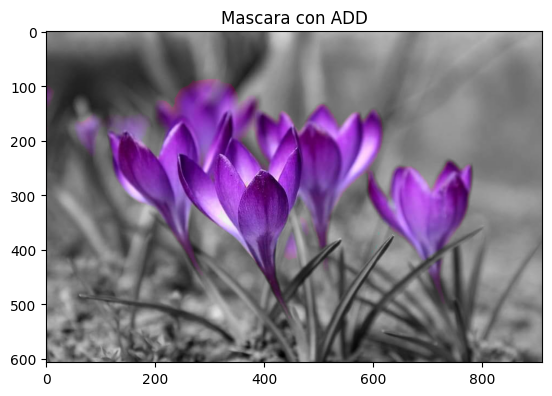

In [24]:
#Resaltando un color en una imagen
img_final=cv.add(img_gray_resta_rgb, img_mascara)
plt_imshow("Mascara con ADD", img_final)